# Chapter6 基于NumPy/SciPy 的数值计算及其应用

▲清单 6.1 基于 SymPy 的矩阵阶数和条件数的计算

In [1]:
import sympy as sy

A = sy.Matrix([[3, 2],
               [-3, 5]])

print(A.rank())
print(A.condition_number().evalf())

2
1.62131007404117


▲清单 6.2 　使用 inv 方法进行求解

In [2]:
b = sy.Matrix([8, -1])

A.inv() * b

Matrix([
[2],
[1]])

▲清单 6.3 使用 solve 方法求解

In [3]:
A.solve(b, 'LU')

Matrix([
[2],
[1]])

▲清单 6.4 LUdecomposition 方法的示例

In [4]:
L, U, _ = A.LUdecomposition()
L

Matrix([
[ 1, 0],
[-1, 1]])

▲清单 6.5 使用 NumPy 计算矩阵的阶数和条件数

In [5]:
import numpy as np

A = np.array([[3, 2],
              [-3, 5]])

print(np.linalg.matrix_rank(A))
print(np.linalg.cond(A))

2
1.6213100740411661


▲清单 6.6 使用 scipy.linalg.solve 函数进行求解

In [6]:
from scipy import linalg

A = np.array([[3, 2],
              [-3, 5]])
b = np.array([[8, -1]]).T

linalg.solve(A, b)

array([[2.],
       [1.]])

▲清单 6.7 scipy.linalg.lu 函数的示例

In [7]:
P, L, U = linalg.lu(A)
L

array([[ 1.,  0.],
       [-1.,  1.]])

▲清单 6.8 allclose 函数的示例

In [8]:
np.allclose(A, P @ L @ U)

True

▲清单 6.9 eigenvals 方法的示例

In [9]:
A_s = sy.Matrix([[2, 3],
                 [1, 4]])    
               
A_s.eigenvals()

{5: 1, 1: 1}

▲清单 6.10 scipy.linalg.eig 函数的示例

In [10]:
A = np.array([[2, 3],
              [1, 4]])

w, X = linalg.eig(A)
print(w)
print(X)

[1.+0.j 5.+0.j]
[[-0.9486833  -0.70710678]
 [ 0.31622777 -0.70710678]]


▲清单 6.11 计算特征值的对角矩阵

In [11]:
linalg.inv(X) @ A @ X

array([[1.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 5.00000000e+00]])

▲清单 6.12 diagonalize 方法的示例

In [12]:
X, D = A_s.diagonalize()
D

Matrix([
[1, 0],
[0, 5]])

▲清单 6.13 linalg.fractional_matrix_power 函数的示例

In [13]:
B = linalg.fractional_matrix_power(A, 0.5)

np.allclose(A, B @ B)

True

▲清单 6.14 对称矩阵的对角化

In [14]:
A = np.array([[4, 2, -3],
              [2, 5, -2],
              [-3, -2, 4]])
w, Q = linalg.eig(A)

np.allclose(np.diag(w), Q.T @ A @ Q)

True

▲清单 6.15 使用 diff 函数计算一阶微分

In [15]:
import sympy as sy

x = sy.symbols('x')
eq = sy.cos(x**2) + x

# eq.diff(x) 也可以
sy.diff(eq, x)

-2*x*sin(x**2) + 1

▲清单 6.16 使用 diff 函数计算二阶微分

In [16]:
#  sy.diff(eq, x, x) 或 eq.diff(x, 2)都可以
sy.diff(eq, (x, 2))

-2*(2*x**2*cos(x**2) + sin(x**2))

▲清单 6.17 使用 diff 函数计算多变量函数的微分

In [17]:
y = sy.symbols('y')
eq = x**3 * y + x**2 * y**2

# eq.diff((x, 2), y)  也可以
sy.diff(eq, (x, 2), y)

2*(3*x + 2*y)

▲清单 6.18 Derivative 对象的示例

In [18]:
n = sy.symbols('n')

# eq.diff((x, n))  也可以
sy.diff(eq, (x, n))

Derivative(x**3*y + x**2*y**2, (x, n))

▲清单 6.19 使用 doit 方法对 Derivative 对象求值

In [19]:
d = sy.Derivative(sy.exp(x**2), x)

d.doit()

2*x*exp(x**2)

▲清单 6.20 misc.derivative 函数的示例

In [20]:
from scipy.misc import derivative

def f(x):
    return x**3 + x**2

derivative(f, 1.0, dx=1e-6)

4.999999999921734

▲清单 6.21 matplotlib.pyplot 的导入

In [21]:
import matplotlib.pyplot as plt

▲清单 6.22 使用 np.gradient 函数进行梯度计算

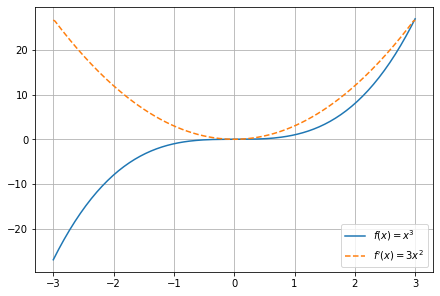

In [22]:
x, dx = np.linspace(-3, 3, 201, retstep=True)
y = x**3

dydx = np.gradient(y, dx)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x, y, label=r'$f(x)=x^3$')
ax.plot(x, dydx, '--', label=r"$f'(x)=3x^2$")
ax.grid()
ax.legend()

▲清单 6.23 使用 np.gradient 函数计算两个变量的函数的梯度

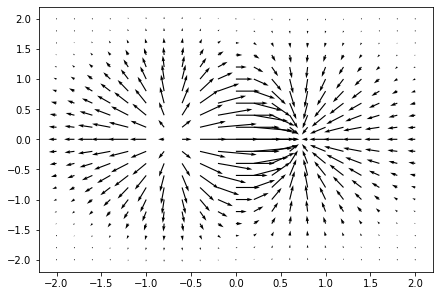

In [23]:
coords, ds = np.linspace(-2, 2, 21, retstep=True)
X, Y = np.meshgrid(coords, coords)
Z = X*np.exp(-X**2 - Y**2)

#  请注意梯度数组是按照行方向和列方向的顺序返回的
dY, dX = np.gradient(Z, ds)

fig, ax = plt.subplots(constrained_layout=True)

ax.quiver(X, Y, dX, dY)

▲清单 6.24 基于 integrate 函数的定积分计算①

In [24]:
a, b, x, y = sy.symbols('a, b, x, y')
eq = sy.Function('f')(x)

# 计算定积分的场合
# eq.integrate((x, a, b)) 也可
sy.integrate(eq, (x, a, b))

# 计算不定积分的场合
# sy.integrate(eq)

Integral(f(x), (x, a, b))

▲清单 6.25 基于 integrate 函数的定积分计算②

In [25]:
sy.integrate(x * sy.exp(-x), (x, 0, sy.oo))

1

▲清单 6.26 Integral 对象的示例

In [26]:
sy.integrate(x**x, x)

Integral(x**x, x)

▲清单 6.27 使用 doit 方法对 Integral 对象进行计算

In [27]:
i = sy.Integral(sy.log(x)**2, x) + 3

i.doit()

x*log(x)**2 - 2*x*log(x) + 2*x + 3

▲清单 6.28 使用 integrate 函数进行多变量函数的积分

In [28]:
eq = x**2 * y

# 使用x进行积分的场合
sy.integrate(eq, x)

#使用y进行积分的场合
# sy.integrate(eq, y)

x**3*y/3

▲清单 6.29 使用 integrate 函数进行多重积分

In [29]:
sy.integrate(x**2 + y**2, x, y)

x**3*y/3 + x*y**3/3

▲清单 6.30 integrate.simps 函数的示例

In [30]:
import numpy as np
from scipy import integrate

a, b = -1, 1
x = np.linspace(a, b, 17)
y = np.exp(-x)

integrate.simps(y, x)

2.350405569304639

▲清单 6.31 integrate.romb 函数的示例

In [31]:
x, dx = np.linspace(a, b, 1 + 2**4, retstep=True)
y = np.exp(-x)

integrate.romb(y, dx=dx)

2.3504023873296926

▲清单 6.32 integrate.quad 函数的示例①

In [32]:
def f(x):
    return np.exp(-x**2) * (x**12 - x**5)

integrate.quad(f, 0, np.inf)

(142.94263890752217, 1.104421543222346e-06)

▲清单 6.33 integrate.quad 函数的示例②

In [33]:
def f(x, a, b):
    return a * x**2 + b * x
    
integrate.quad(f, 0, 1, args=(1, 2))

(1.3333333333333333, 1.4802973661668752e-14)

▲清单 6.34 integrate.dblquad 函数的示例

In [34]:
def f(x, y):
    return 4 - x ** 2 - y ** 2

integrate.dblquad(f, 0, 1, lambda x: x - 1, lambda x: 1 - x)

(3.6666666666666665, 8.127150052361729e-14)

▲清单 6.35 integrate.tplquad 函数的示例

In [35]:
def f(x, y, z):
    return (x + y + z) ** 2

integrate.tplquad(f, -1, 1, lambda x: -1, lambda x: 1,
                  lambda x, y: -1, lambda x, y: 1)

(7.999999999999999, 9.5449561109889e-14)

▲清单 6.36 max 函数和 ptp 函数的示例

In [36]:
import numpy as np

x = np.array([2.1, 3.8, 5.4, 0.7, 1.9, 6.3, 4.2])

print(np.max(x))
print(np.ptp(x))

6.3
5.6


▲清单 6.37 sum 函数和 mean 函数的示例

In [37]:
print(np.sum(x))
print(np.mean(x))

24.4
3.4857142857142853


▲清单 6.38 var 函数和 std 函数的示例

In [38]:
print(np.var(x))
print(np.std(x, ddof=1))

3.484081632653062
2.0161254685068353


▲清单 6.39 quantile 函数和 percentile 函数的示例

In [39]:
print(np.quantile(x, [0.25, 0.5, 0.75]))
print(np.percentile(x, [25, 50, 75]))

[2.  3.8 4.8]
[2.  3.8 4.8]


▲清单 6.40 stats.describe 函数的示例

In [40]:
from scipy import stats

stats.describe(x)

DescribeResult(nobs=7, minmax=(0.7, 6.3), mean=3.4857142857142853, variance=4.064761904761906, skewness=0.03150596531455972, kurtosis=-1.2740292862952567)

▲清单 6.41 random.rand 函数的示例

In [41]:
#  4列的一维数组
print(np.random.rand(4))

#  2行5列的二维数组
print(np.random.rand(2, 5))

[0.99820109 0.28753784 0.07238078 0.22507358]
[[0.10252679 0.93334641 0.50531277 0.69039373 0.62346126]
 [0.83089965 0.65767595 0.60996151 0.15880007 0.21965345]]


▲清单 6.42 random.randint 函数的示例

In [42]:
np.random.randint(1, 10, size=(2, 5))

array([[4, 5, 9, 1, 1],
       [8, 2, 5, 2, 6]])

▲清单 6.43 random.randn 函数与 random.normal 函数的示例

In [43]:
# 标准正态分布
print(np.random.randn(10))

# 平均值为0、标准差为0.5的正态分布
print(np.random.normal(0, 0.5, 10))

[-1.76577018  0.78914725  0.64457546  1.0855814   0.82308982 -1.30793078
 -0.17547978  0.11850531  1.087511   -0.23418395]
[ 0.07142357  0.20869464  0.84515456 -0.6879768  -1.21844589  0.40938842
 -0.22593169 -0.2354376   0.20843502 -0.5136831 ]


▲清单 6.44 matplotlib.pyplot 的导入

In [44]:
import matplotlib.pyplot as plt

▲清单 6.45 直方图的创建



Text(0, 0.5, 'frequency')

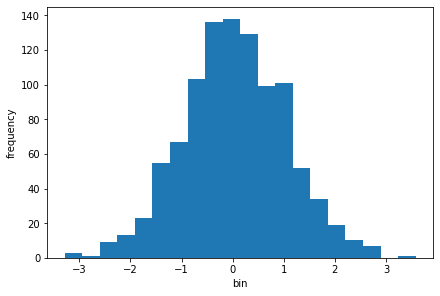

In [45]:
fig, ax = plt.subplots(constrained_layout=True)

ax.hist(np.random.randn(1000), bins=20)
ax.set_xlabel('bin')
ax.set_ylabel('frequency')

▲清单 6.46 random.seed 函数的示例

In [46]:
np.random.seed(0)
print(np.random.randn(5))

np.random.seed(0)
print(np.random.randn(5))

[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]
[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]


▲清单 6.47 使用 SymPy 求取标准正态分布的概率密度函数

In [47]:
import sympy as sy
import sympy.stats

X = sy.stats.Normal('X', 0, 1)
x = sy.symbols('x')
sy.stats.density(X)(x)

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

▲清单 6.48 stats 方法的示例

In [48]:
from scipy import stats

X = stats.norm(0, 1)

# 平均值、方差、偏度、峰度
X.stats('mvsk')

(array(0.), array(1.), array(0.), array(0.))

▲清单 6.49 pdf 方法的示例

In [49]:
X.pdf([0, 1])

array([0.39894228, 0.24197072])

▲清单 6.50 cdf 方法和 ppf 方法的示例

In [50]:
print(X.cdf(0))
print(X.ppf(0.5))

0.5
0.0


▲清单 6.51 interval 方法的示例

In [51]:
# X.ppf(0.05), X.ppf(0.95) でも可
X.interval(0.9)

(-1.6448536269514729, 1.6448536269514722)

▲清单 6.52 rvs 方法的示例

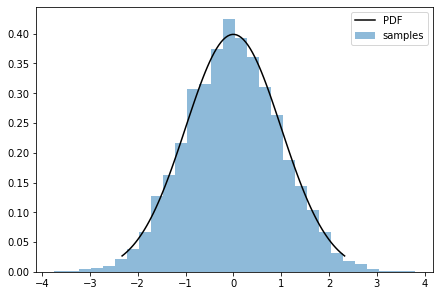

In [52]:
# 用于绘制概率密度函数的数组
x = np.linspace(X.ppf(0.01), X.ppf(0.99), num=100)

fig, ax = plt.subplots(constrained_layout=True)

# 生成的随机数的直方图
np.random.seed(0)
ax.hist(X.rvs(5000), label='samples', density=True,
        bins=30, alpha=0.5)
# 概率密度函数的统计图
ax.plot(x, X.pdf(x), 'k', label='PDF')
ax.legend()

▲清单 6.53 fit 方法的示例

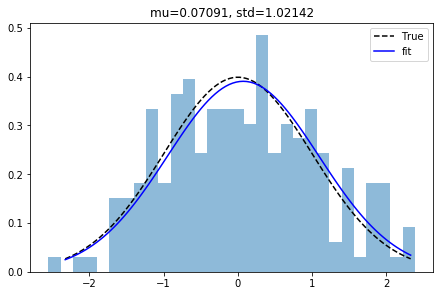

In [53]:
# 根据随机数组推测参数
np.random.seed(0)
samples = X.rvs(200)
mu, std = stats.norm.fit(samples)

# 创建推测得到的参数的正态分布的随机变量对象
X_fit = stats.norm(mu, std)

fig, ax = plt.subplots(constrained_layout=True)

ax.hist(samples, density=True, bins=30, alpha=0.5)
ax.plot(x, X.pdf(x), 'k--', label='True')
ax.plot(x, X_fit.pdf(x), 'b', label='fit')
# 将推测得到的参数显示到图表的标题中
ax.set_title(f'mu={mu:.5f}, std={std:.5f}')
ax.legend()

▲清单 6.54 Polynomial 对象的示例

In [54]:
from numpy.polynomial import Polynomial as P

p = P([2, -3, 1])
p

Polynomial([ 2., -3.,  1.], domain=[-1,  1], window=[-1,  1])

▲清单 6.55 fromroots 方法的示例

In [55]:
p = P.fromroots([1, 2])
p

Polynomial([ 2., -3.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

▲清单 6.56 roots 方法的示例

In [56]:
p.roots()

array([1., 2.])

▲清单 6.57 多项式的计算

In [57]:
import numpy as np

p(np.array([0, 1, 1.5]))

array([ 2.  ,  0.  , -0.25])

▲清单 6.58 多项式的算术运算

In [58]:
p2 = P.fromroots([1])

p // p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

▲清单 6.59 derive 方法的示例

In [59]:
p.deriv()

Polynomial([-3.,  2.], domain=[-1.,  1.], window=[-1.,  1.])

▲清单 6.60 切比雪夫基底多项式的示例

In [60]:
from numpy.polynomial import Chebyshev as T

ch = T([2.5, -3., 0.5])
ch

Chebyshev([ 2.5, -3. ,  0.5], domain=[-1,  1], window=[-1,  1])

▲清单 6.61 fit 方法的示例

In [61]:
# 数据点的x坐标和y坐标的数组
x = np.array([1, 2, 4, 5])
y = np.array([1, -1, 4, 5])
# 多项式插值的次数
deg = len(x) - 1

p = P.fit(x, y, deg)
p

Polynomial([ 1.,  6.,  2., -4.], domain=[1., 5.], window=[-1.,  1.])

▲清单 6.62 convert 方法的示例

In [62]:
p.convert().coef

array([ 10. , -13.5,   5. ,  -0.5])

▲清单 6.63 matplotlib.pyplot 的导入

In [63]:
import matplotlib.pyplot as plt

▲清单 6.64 插值结果的图形化



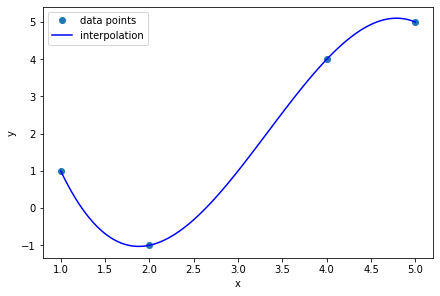

In [64]:
x2 = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(constrained_layout=True)

# 绘制数据点和多项式插值的结果
ax.plot(x, y, 'o', label='data points')
ax.plot(x2, p(x2), 'b', label='interpolation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

▲清单 6.65 龙格现象的示例

C:\Users\mydev\anaconda3\envs\myenv\lib\site-packages\numpy\polynomial\polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


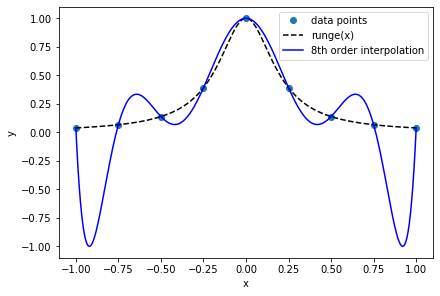

In [65]:
def runge(x):
    return 1 / (25 * x**2 + 1)

x1 = np.linspace(-1, 1, 9)
p = P.fit(x1, runge(x1), 9)

x2 = np.linspace(-1, 1, 300)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x1, runge(x1), 'o', label='data points')
ax.plot(x2, runge(x2), 'k--', label='runge(x)')
ax.plot(x2, p(x2), 'b', label='8th order interpolation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

▲清单 6.66 龙格函数的三次样条插值

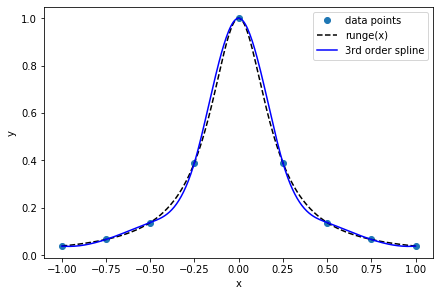

In [66]:
from scipy import interpolate

spl = interpolate.InterpolatedUnivariateSpline(x1,
                                               runge(x1))

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x1, runge(x1), 'o', label='data points')
ax.plot(x2, runge(x2), 'k--', label='runge(x)')
ax.plot(x2, spl(x2), 'b', label='3rd order spline')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

▲清单 6.67 PCHIP 插值

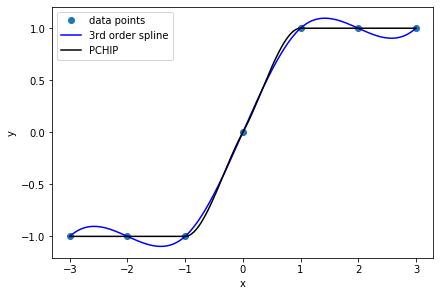

In [67]:
x = np.linspace(-3, 3, 7)
y = np.array([-1, -1, -1, 0, 1, 1, 1])

spl = interpolate.InterpolatedUnivariateSpline(x, y)
pchip = interpolate.PchipInterpolator(x, y)

x2 = np.linspace(-3, 3, 300)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x, y, 'o', label='data points')
ax.plot(x2, spl(x2), 'b', label='3rd order spline')
ax.plot(x2, pchip(x2), 'k', label='PCHIP')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()